## More regression work with Scikit-Learn


I have been enjoying working with SKlearn, and I think I personally pefer it for working with spreadsheets and doing some of the more simple machine learning and Nerual Networks. 

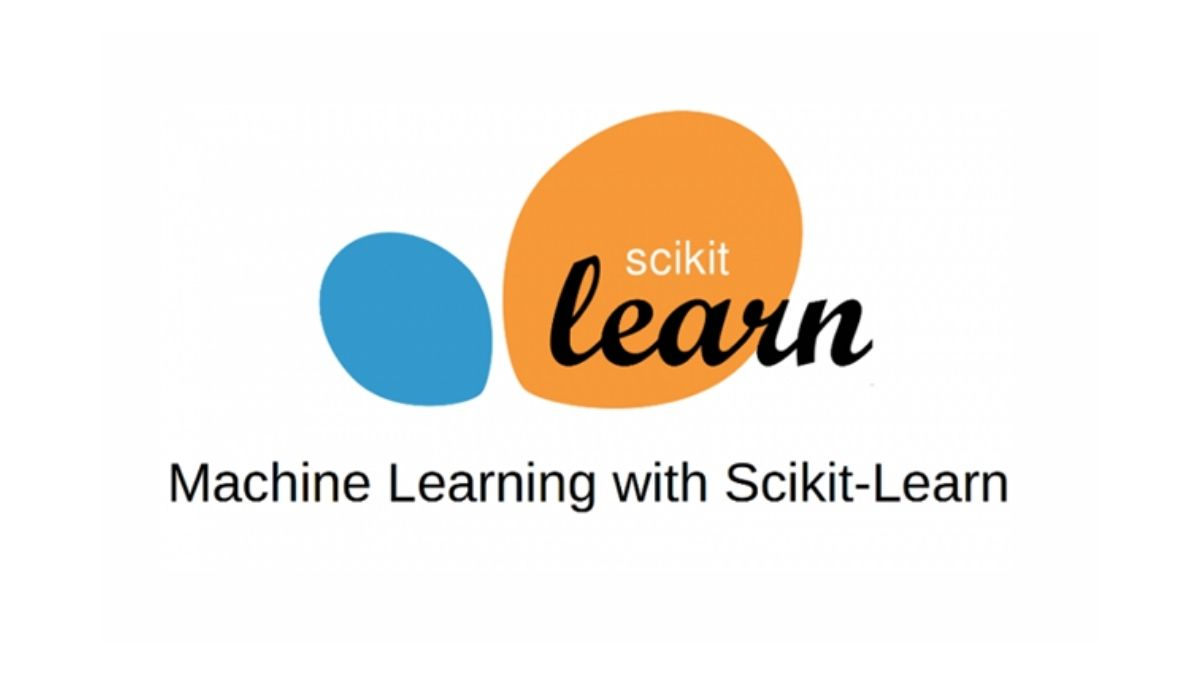

I will be going on kaggle and downloading a data set to work with again. 

I will post the link, and I will be uploading the data into the github repo as well. 

### Heart attack Analysis and Prediction Dataset

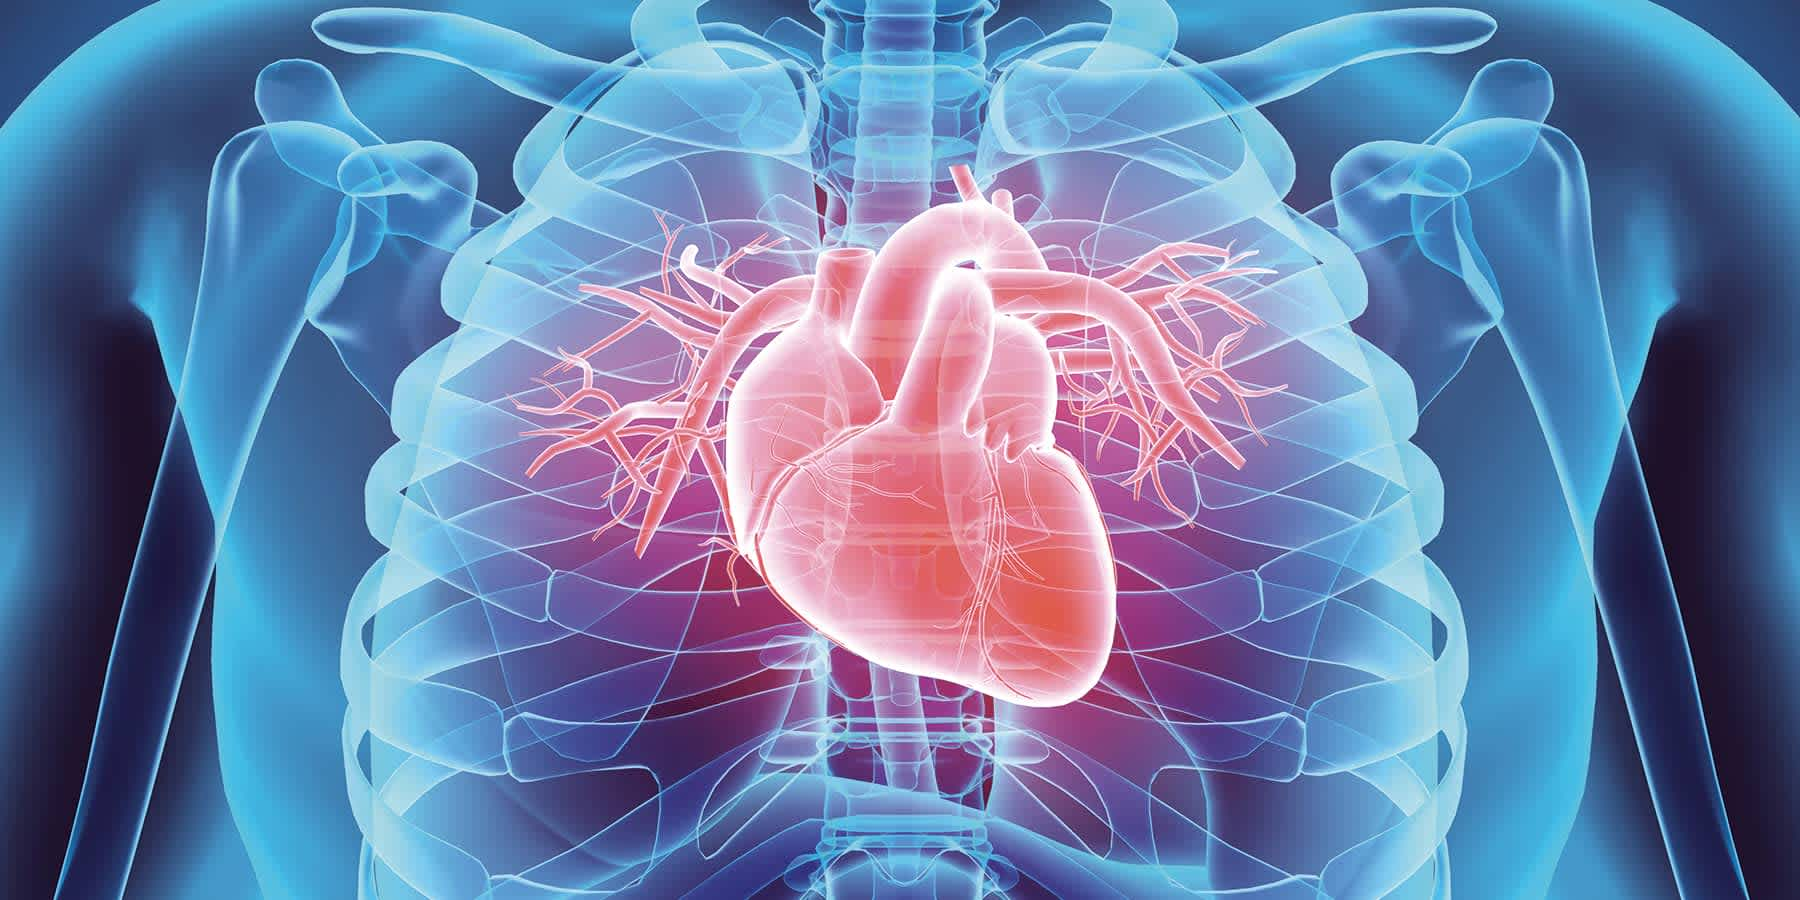

Link to data set: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
# Getting all of the Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 


In [15]:
df = pd.read_csv(r'C:\Users\user\Math_Github\Data\heart.csv')
print(df.head())
df.columns

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

#### The Headers of the data is as follows: 

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved


#### What we are after is the output. The output 1 = more chance of heart attack, and the 0 = less chance of heart attack.


In [3]:
# Starting with the correlation matrix

corr = df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

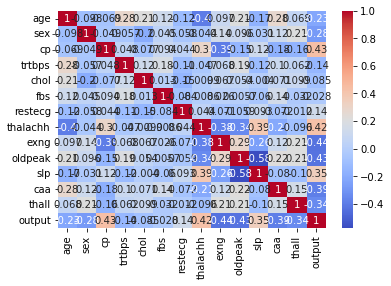

In [14]:
# Making a heatmap of the correlation matrix using seaborn 

sns.heatmap(corr, annot = True, cmap = 'coolwarm')


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

c:\coding\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

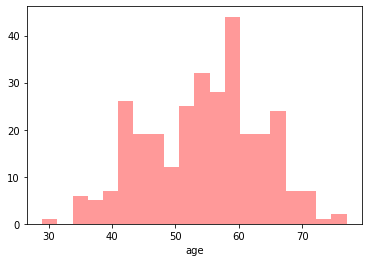

In [18]:
# Charting the age of people who have had heart attacks

sns.distplot(df['age'], bins = 20, kde = False, color = 'red')

In [22]:
# Getting the median age of people who have had heart attacks 

df['age'].median()


55.0

In [23]:
# getting the median age of people who have not had heart attacks

df[df['output'] == 0]['age'].median()

58.0

<AxesSubplot:xlabel='output', ylabel='age'>

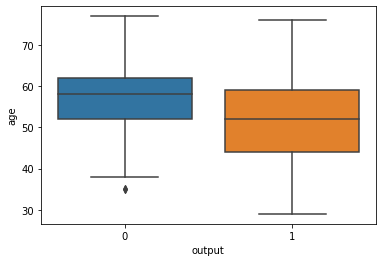

In [69]:
# Charting and getting the quartiles

sns.boxplot(x = 'output', y = 'age', data = df)

<AxesSubplot:xlabel='age', ylabel='chol'>

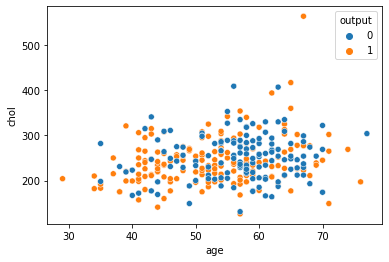

In [26]:
# Scatter plot of the age of people who have had heart attacks and what their Cholestrol levels are 

sns.scatterplot(x = 'age', y = 'chol', hue = 'output', data = df)

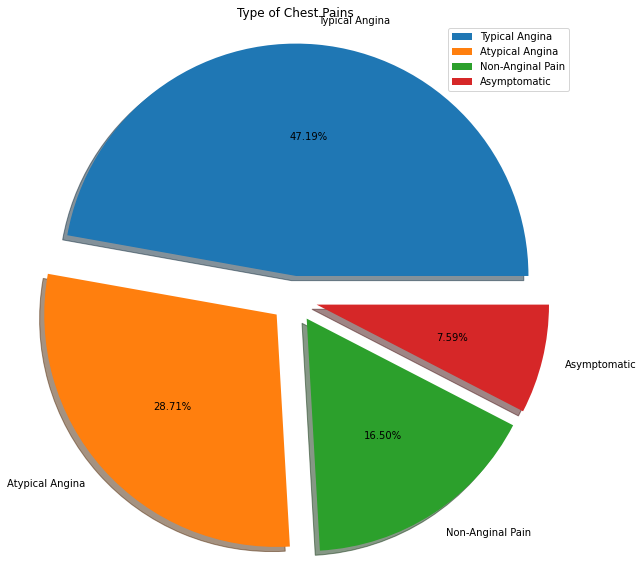

In [27]:
# Pie Chart of Chest pain Types 

plt.figure(figsize = (10, 10))
plt.pie(df['cp'].value_counts(), labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], autopct = '%.2f%%', explode = [0.1, 0.1, 0.1, 0.1], shadow = True)
plt.title('Type of Chest Pains')
plt.legend()
plt.axis('equal')
plt.show()

#### What we are seeing from the data

The majority of people who have had a heart attack, are around the age of 45-60. The people who have not had a heart attack in this data set are much older. We can see that just because you have higher cholestoral, does not mean you will have a heart attack.In fact most of the younger people who have had a heart attack have lower cholestoral levels. 

People who have Typical Angina are more likely to have a heart attack.

We are going to be attempting to optimize a model to predict if someone will have a heart attack or not. 

### Start of the model 

In [29]:
# Doing some quick Cleaning 

df.drop('caa', axis = 1, inplace = True)
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'thall', 'output'],
      dtype='object')

In [62]:
# Shuffling the data for a New split

from sklearn.utils import shuffle

df = shuffle(df)

In [63]:
x = df.drop('output', axis = 1)
y = df['output']

In [64]:
# Importing all of the necessary libraries for the model 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [65]:
# Splitting the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 43)

In [66]:
# Seeing the shape of the training and the test sets 

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((272, 12), (31, 12), (272,), (31,))

In [67]:
# Logistic Regression

logreg_model = LogisticRegression()
logreg_model.fit(x_train,y_train)

c:\coding\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = logreg_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8387096774193549


### Testing Accuracy 

Test 1: 0.8688524590163934

Change 1: Shuffle the data 
 
Test 2: 81.9672131147541

Change 2: Change the test size to 0.3

test 3: 0.819672131147541

Change 3: Change the test size to 0.2 and a reshuffle 

test 4: 0.7540983606557377

Change 4: Change the test size to 0.1 and a reshuffle

Test 5 = 0.8387096774193549



We Can keep on Chasing after the best accuracy, but we are going to stop here. I think that the best accuracy is going to be around 0.8, due to the fact that the model does not have the strong enough correlation. I think that if we got more data for each subject, then we might be able to get the better accuracy.

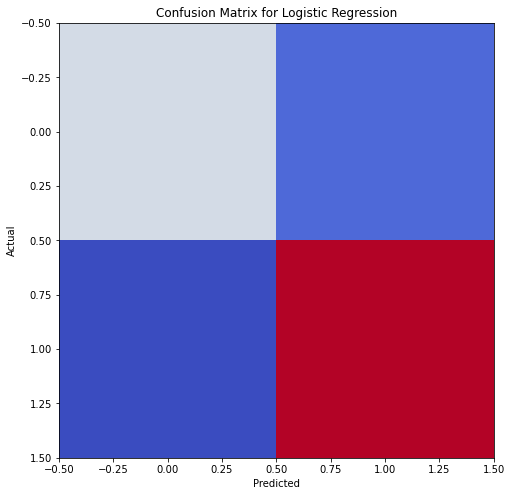

In [75]:
# Running a Confusion Matrix on the model 

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10, 8))
plt.imshow(cm, cmap = 'coolwarm')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
